In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(False)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# atria
models["LA"].u_vol = 0.0
models["RA"].u_vol = 0.0
models["LA"].el_min = 1500
models["RA"].el_min = 1500
models["LA"].el_max = 2000
models["RA"].el_max = 2000

# ventricles
models["LV"].u_vol = 0.0
models["RV"].u_vol = 0.0
models["LV"].el_min = 500
models["RV"].el_min = 500
models["LV"].el_max = 25000
models["RV"].el_max = 25000

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(120)
neo.analyze_heart()

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 5.1 sec. Average model step in 0.0213 ms.

LA_LV.flow      : net  224.81126, forward  224.81126, backward        0.0 ml/kg/min, stroke volume:    1.60578 ml/kg, 
RA_RV.flow      : net  224.81617, forward  224.81617, backward        0.0 ml/kg/min, stroke volume:    1.60582 ml/kg, 
RV_PA.flow      : net  224.62875, forward  224.62875, backward        0.0 ml/kg/min, stroke volume:    1.60448 ml/kg, 
LV_AA.flow      : net  224.51875, forward  224.51875, backward        0.0 ml/kg/min, stroke volume:    1.60369 ml/kg, 
IVCI_RA.flow    : net  124.41228, forward  127.11182, backward   -2.69954 ml/kg/min, stroke volume:    0.88865 ml/kg, 
SVC_RA.flow     : net   97.78334, forward  102.11962, backward   -4.33628 ml/kg/min, stroke volume:    0.69845 ml/kg, 
LA.pres_in      : max   10.03642 min    4.29546
RA.pres_in      : max    9.05724 min    4.11119
LV.pres_in      : max   70.96323 min    1.58652
RV.pres_in      : max   42.7750

Target volumes
LV EDV - 2.51 ml/kg LV ESV - 0.78 ml/kg SV - 1.73 ml/kg  HF 140 bpm LVO 240 ml/kg/min

In [3]:
neo.analyze(["LA.pres_in"])


LA.pres_in      : max    10.0344 min    4.30499


{}

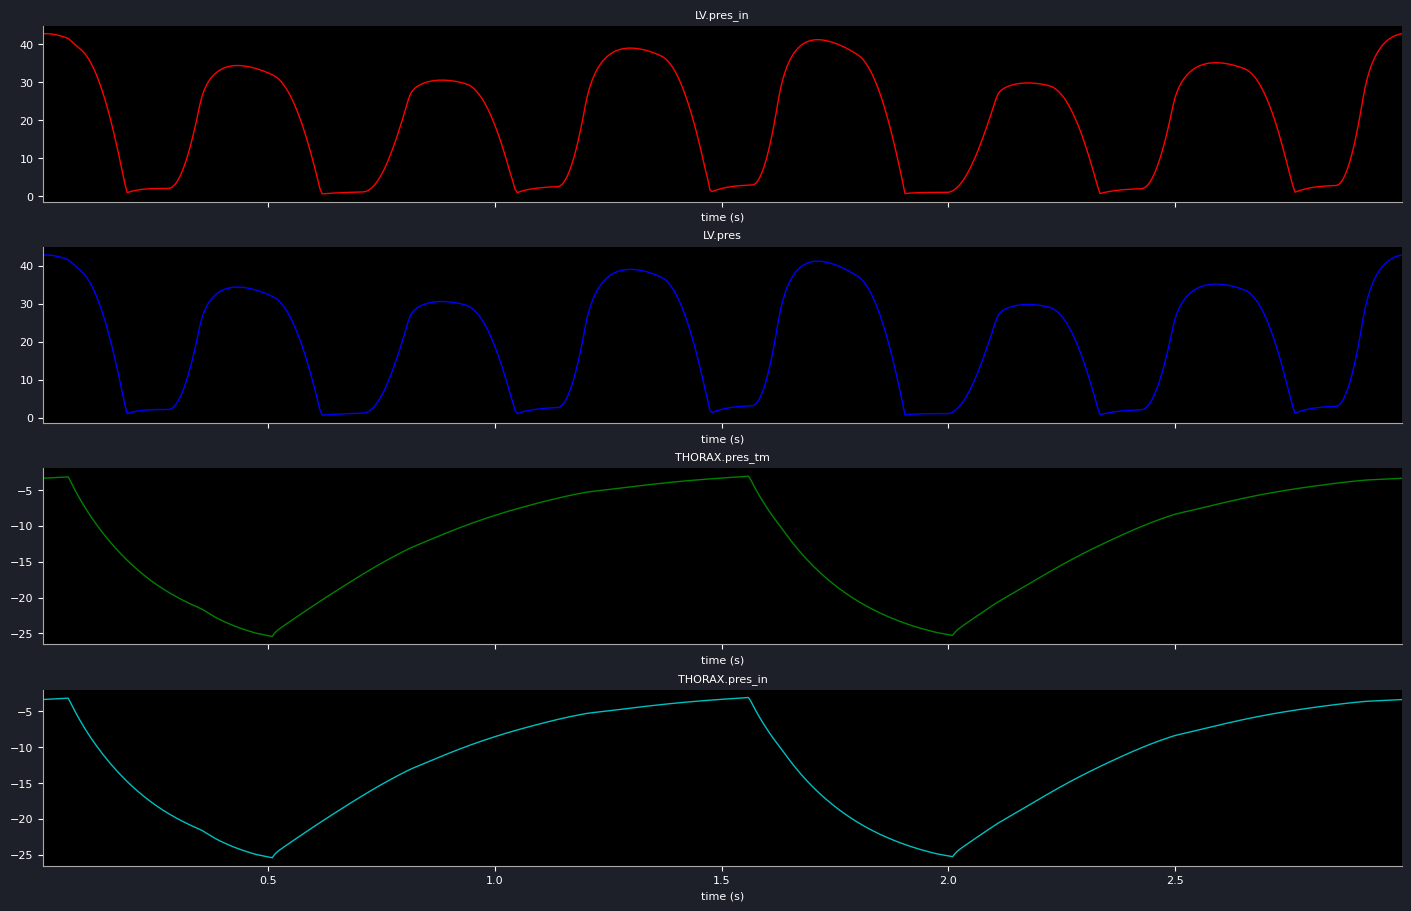


LV.pres_in      : max   42.72705 min    0.67104
LV.pres         : max   42.85552, min    0.70292 mmHg
THORAX.pres_tm  : max   -3.10586 min  -25.41601
THORAX.pres_in  : max   -3.10586 min  -25.41601


In [2]:
neo.plot_time_graph(["LV.pres_in","LV.pres", "THORAX.pres_tm", "THORAX.pres_in"], combined=False, sharey=False, time_to_calculate=3, fill=False,analyze=True)

In [ ]:
neo.plot_time_graph()